In [ ]:
!pip install scikit-optimize

In [2]:
from sklearn.datasets import load_digits

data=load_digits()

In [3]:
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
x,y=data.data,data.target

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y)

In [6]:
x_train.shape

(1347, 64)

In [7]:
x_test.shape

(450, 64)

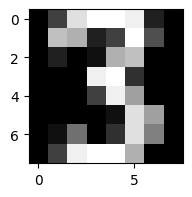

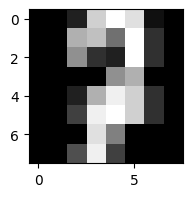

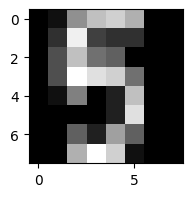

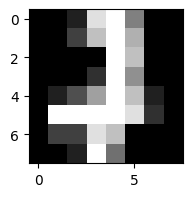

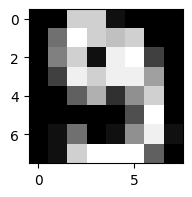

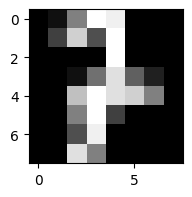

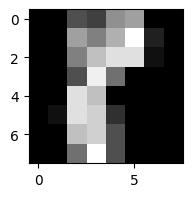

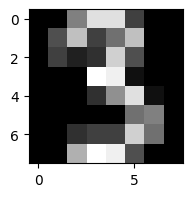

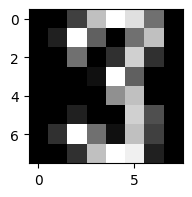

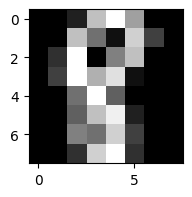

In [8]:
from matplotlib import pyplot as plt
for i in range(10):
  # plt.set_size_inches(5,5)
  ax=plt.imshow(x_train[i,:].reshape(-1,8),cmap="gray")
  ax.figure.set_size_inches(2,2)
  plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(multi_class="ovr",max_iter=1000)

lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

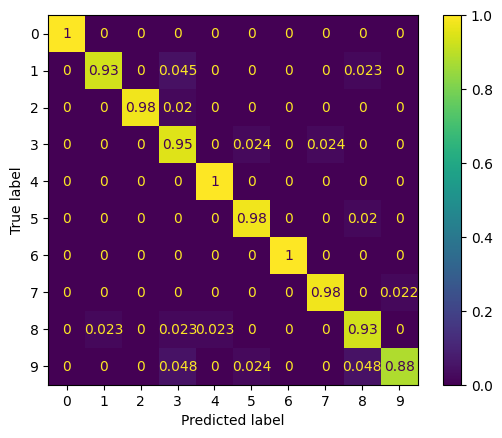

In [10]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred,labels=[0,1,2,3,4,5,6,7,8,9],normalize="true")

cmd=ConfusionMatrixDisplay(cm)

cmd.plot()

In [19]:
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression
opt=BayesSearchCV(
    LogisticRegression(max_iter=1000),
    {
        "fit_intercept": [True,False],
        "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
    },
    n_iter=20,
    cv=3
)

opt.fit(x_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(x_test, y_test))
print("best hyperparams: {}".format(opt.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

val. score: 0.9599109131403117
test score: 0.9688888888888889
best hyperparams: OrderedDict([('fit_intercept', False), ('solver', 'sag')])


In [20]:
optlr=LogisticRegression(max_iter=1000,fit_intercept=False,solver="sag")

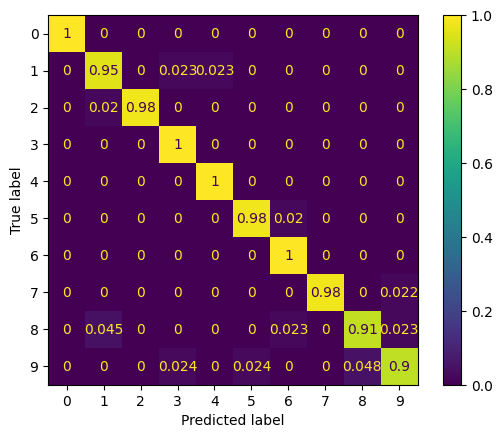

In [22]:
optlr.fit(x_train,y_train)
y_pred=optlr.predict(x_test)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred,labels=[0,1,2,3,4,5,6,7,8,9],normalize="true")

cmd=ConfusionMatrixDisplay(cm)

cmd.plot()